## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

Is the distribution of body temperatures normal? 
Based on histogram below, the distribution seems normal. 

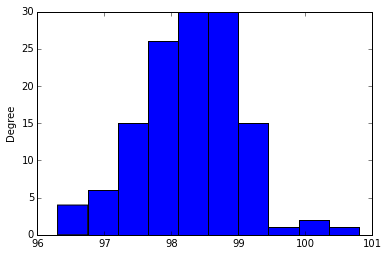

In [8]:
df.temperature.plot(kind="hist")

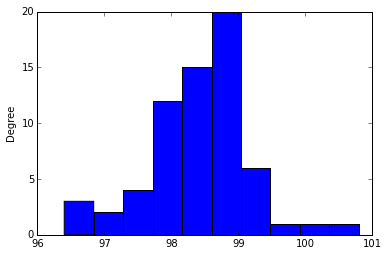

In [28]:
df[df.gender =="F"].temperature.plot(kind="hist")

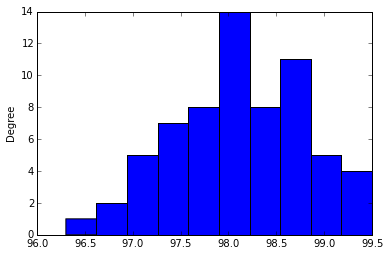

In [27]:
df[df.gender =="M"].temperature.plot(kind="hist")

Is the true population mean really 98.6 degrees F?
In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?

Although sample size is greater than 30, the population standard deviation is unknown, so t-test would be appropriate
 
Based on p-value of 2.4106320415561276e-07, reject null hypothesis. Therefore, the difference between the null value of 98.6 and the sample mean of 98.2 is <b>not</b> due to chance or sampling variability.

In [58]:
# Use t score to test null hypothesis (mu = 98.6), and significance level 5%.
# method 1:
se = df.temperature.std()/ sqrt(df.temperature.count())
x_bar = df.temperature.mean()
T = (x_bar - 98.6)/ se
df = 129
# using one tail t table, p-value < .00005


In [60]:
#method 2:
from scipy import stats
mu = 98.6
t_stats = stats.ttest_1samp(df.temperature, mu) #(T score, p-value)
t_stats

(-5.4548232923645195, 2.4106320415561276e-07)

At what temperature should we consider someone's temperature to be "abnormal"?

Both low and high body temperatures can be abnormal. So a body temperature less than 98.1 or greater than 98.4 can be considered abnormal. 

In [64]:
# method 1:
# at 95% confidence interval, critical T (two-tail) is about 1.98 and critical Z is about 1.960.
ME = 1.98 * df.temperature.std()/sqrt(len(df)) 
# or if using critical Z
# ME = 1.96 * df.temperature.std()/sqrt(len(df)) 
CI = (x_bar - ME, x_bar + ME)
CI

(98.121908023891308, 98.37655351457019)

In [63]:
# method 2:
# using critical Z
CI = stats.norm.interval(.95, loc=df.temperature.mean(), scale=df.temperature.std()/sqrt(len(df)))
CI

(98.123196428181217, 98.375265110280282)

Is there a significant difference between males and females in normal temperature?

The p-value is about 2.4%. Therefore, with at a significance level of 5%, the null hypothesis is not rejected and there is not a statistical significance between male and female temperatures.  

In [55]:
males = df[df.gender == "M"]
females = df[df.gender == "F"]

# method 1:
x_barM = males.temperature.mean()
x_barF = females.temperature.mean()
x_barDiff = x_barM - x_barF
se_diff = sqrt(((males.temperature.std()**2)/len(males)) + ((females.temperature.std()**2)/len(females)))
T = x_barDiff/ se_diff
# using two tail t table, p-value is about .02

-2.2854345381615975

In [66]:
# method 2:
stats.ttest_ind(males.temperature, females.temperature) # (T score, p-value)

(-2.2854345381656103, 0.023931883122395609)